In [1]:
pip install --upgrade pandas numpy seaborn scikit-learn xgboost

  Using cached pandas-2.2.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.22.4-cp39-cp39-macosx_10_15_x86_64.whl.metadata (2.0 kB)
Using cached pandas-2.2.3-cp39-cp39-macosx_10_9_x86_64.whl (12.6 MB)
Using cached numpy-1.22.4-cp39-cp39-macosx_10_15_x86_64.whl (17.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.22.4 which is incomp

In [2]:
import os
import numpy
import pandas as pd


/Users/liamkristoffy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/liamkristoffy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:

data_path = '../data/housing.csv'
df = pd.read_csv(data_path, header=None, sep='\s+')
df.columns=column_names

In [5]:
print(df.shape)
print(df.head())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [6]:
print(df.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 600]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    print(nCol)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

14


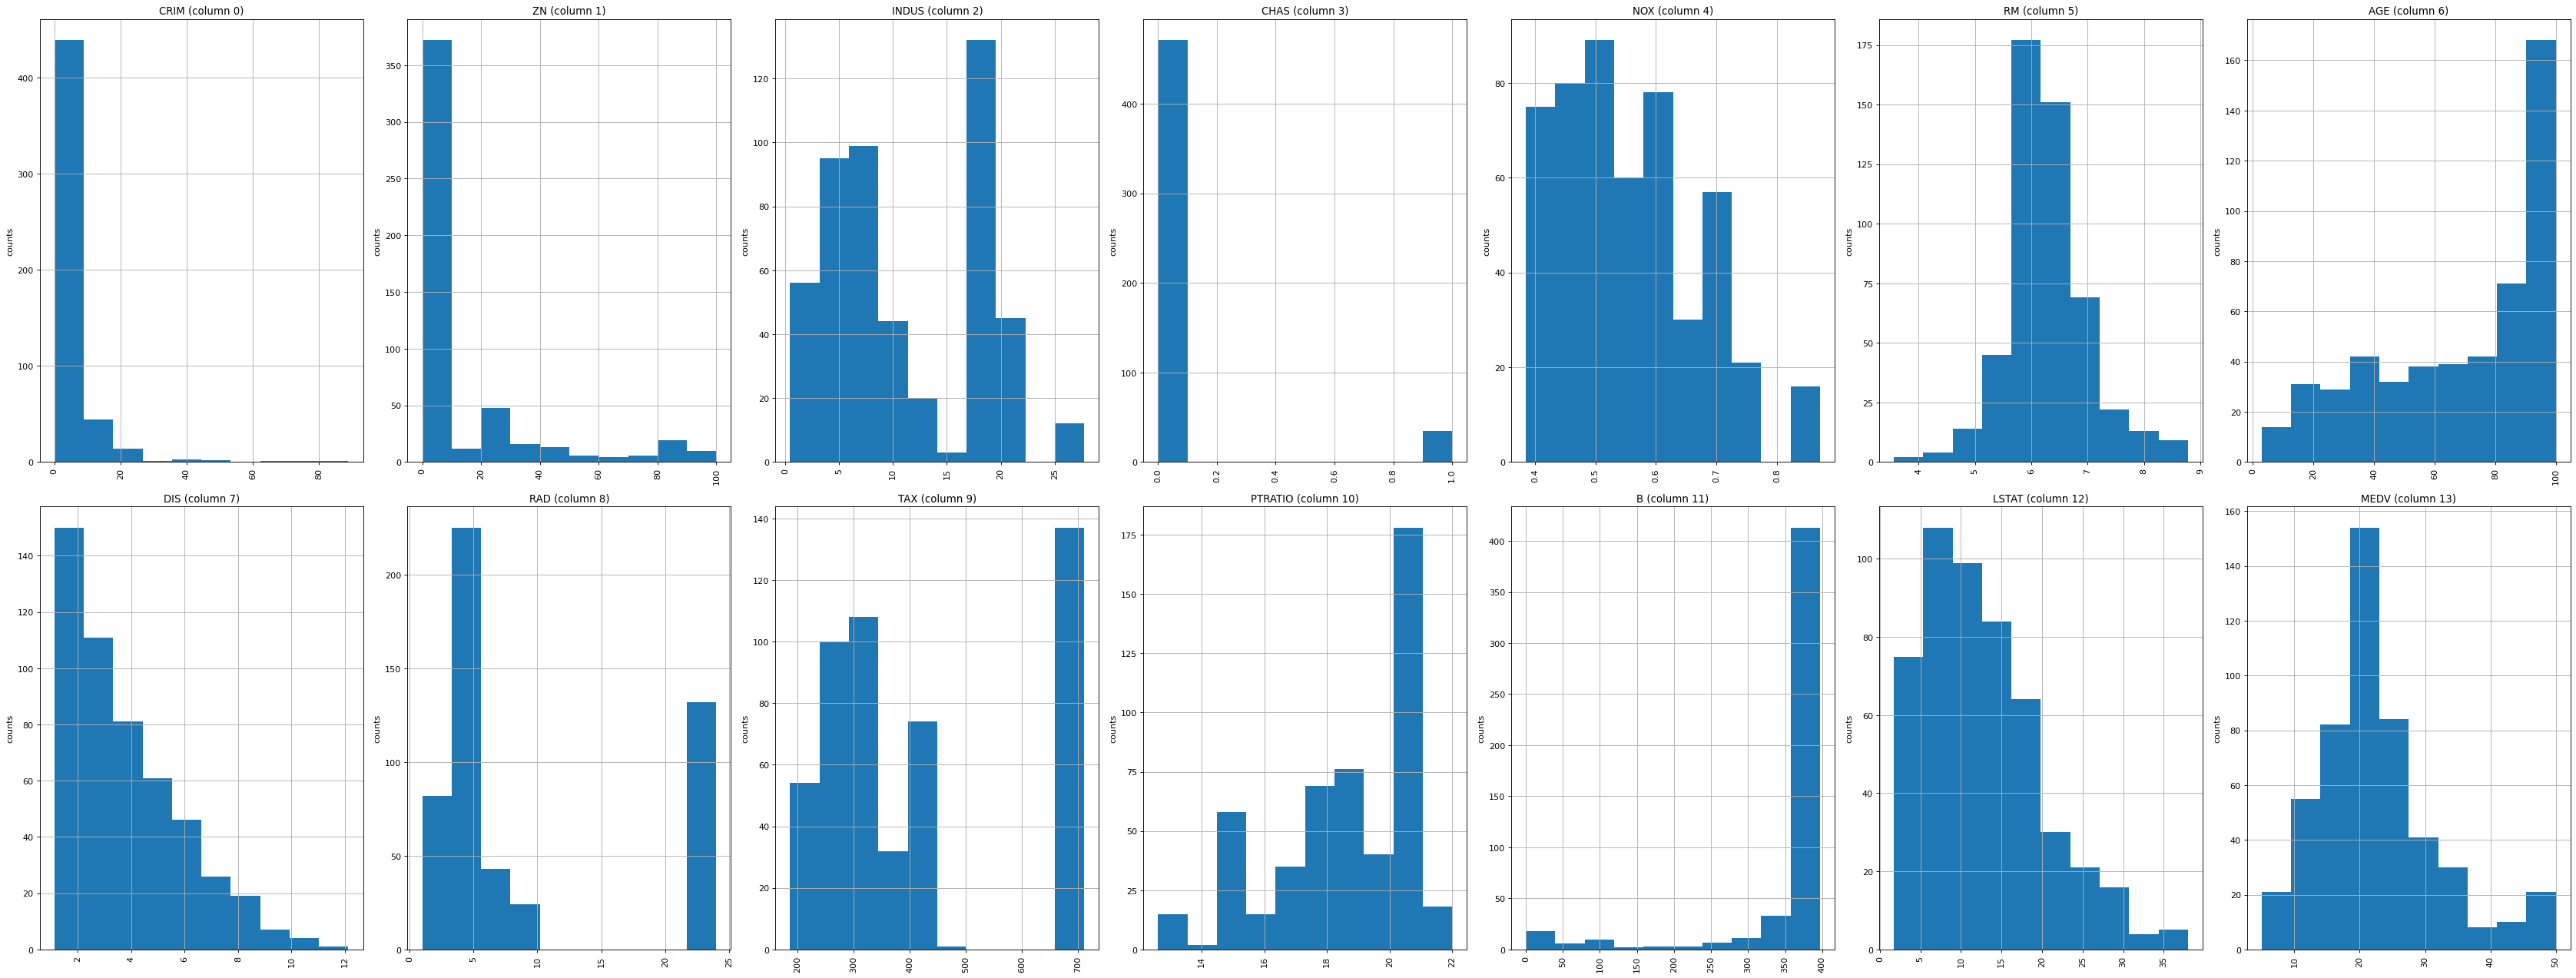

In [8]:
plotPerColumnDistribution(df, 14, 7)

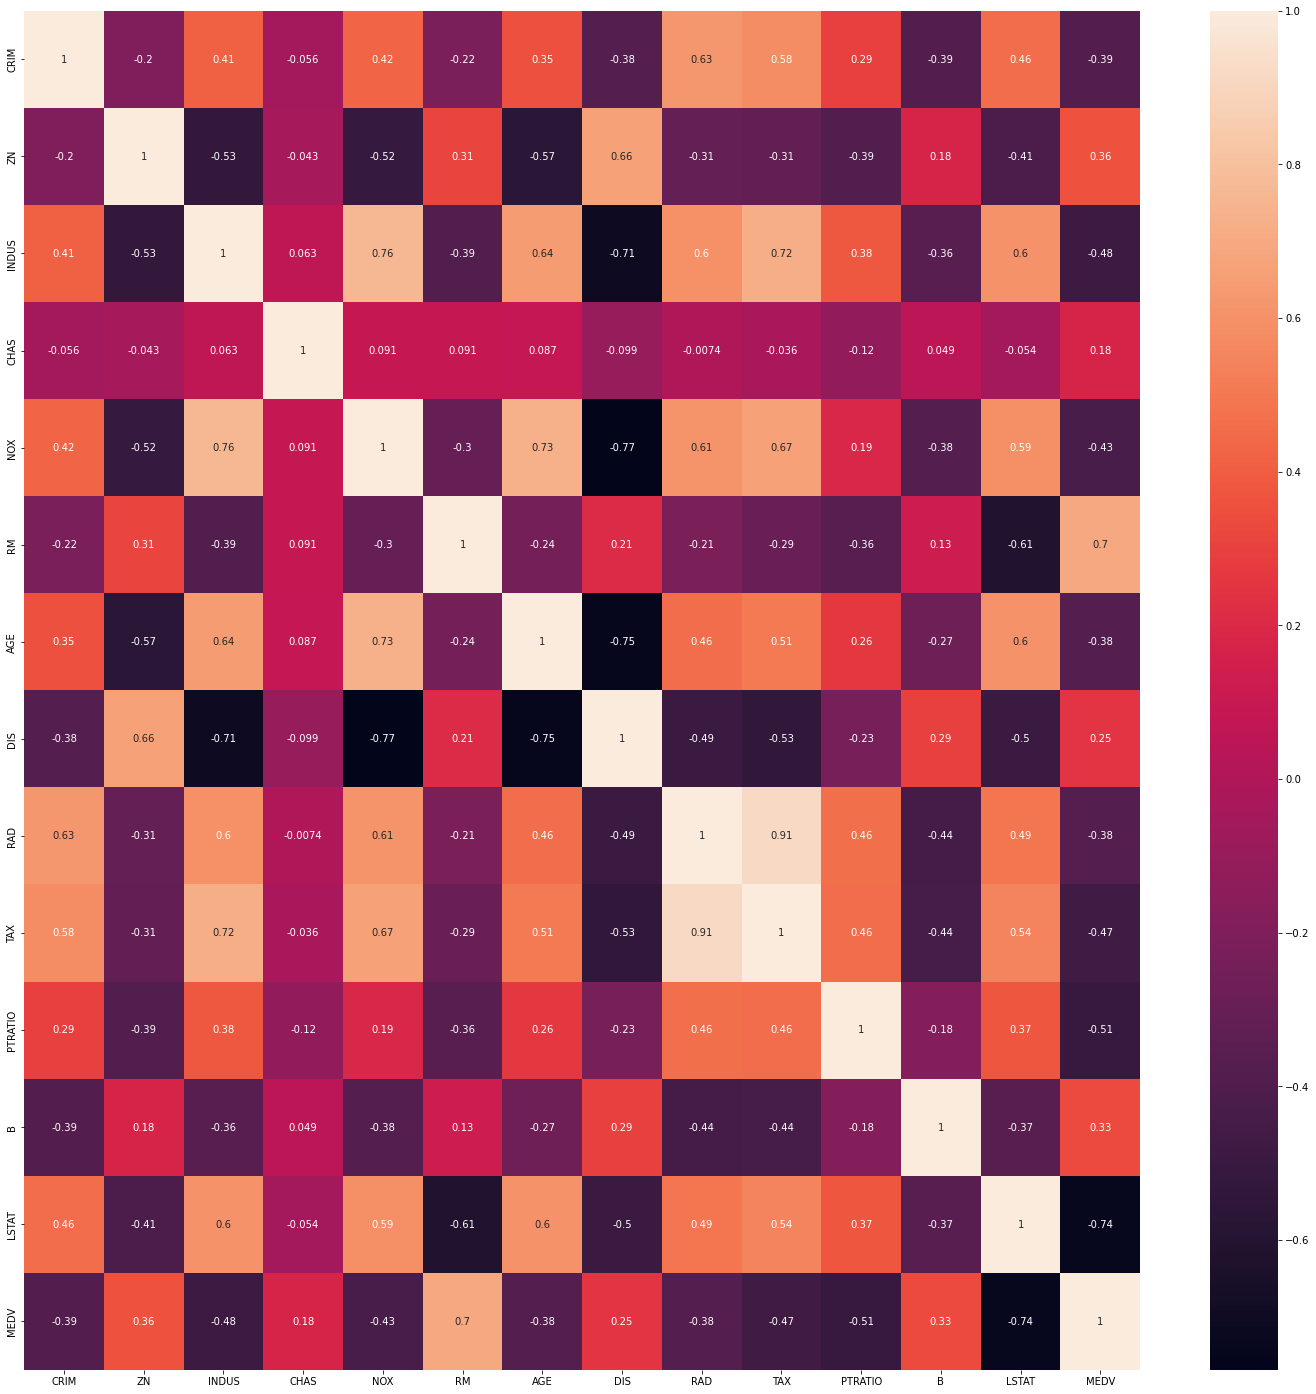

In [9]:
import seaborn as sns

cor = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor, annot=True)
plt.show()

In [10]:
X_features = df.drop(columns=['MEDV'])
y = df['MEDV']

In [12]:
from sklearn.feature_selection import mutual_info_regression


importances = mutual_info_regression(X_features,y)

feat_importances = pd.Series(importances, X_features.columns)

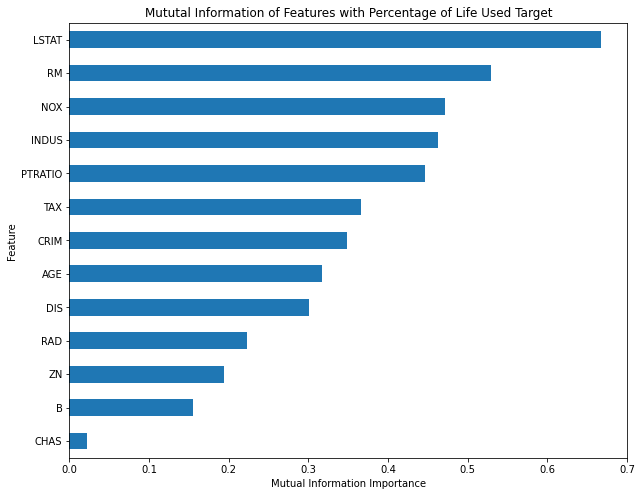

In [13]:
feat_importances.sort_values().plot(kind='barh', figsize=(10,8), xlabel='Mutual Information Importance', ylabel='Feature', title='Mututal Information of Features with Percentage of Life Used Target')
plt.show()

In [14]:

from sklearn.model_selection import cross_val_score, train_test_split, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example: Using the previously created feature DataFrame (df)

# Optional: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=10)

# Define the pipeline with StandardScaler and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5))
])

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a scoring function (e.g., Mean Squared Error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation using the X
cv_scores = cross_val_score(pipeline, X_features, y, cv=kf, scoring=scorer)

# Print the results
print(f"Cross-Validation MSE: {-np.mean(cv_scores)} ± {np.std(cv_scores)}")

Cross-Validation MSE: 8.967257122708244 ± 2.5340107188179726


In [15]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

Performance Report:
Mean Absolute Error (MAE): 1.85
Mean Squared Error (MSE): 6.12
Root Mean Squared Error (RMSE): 2.47
R² Score: 0.92


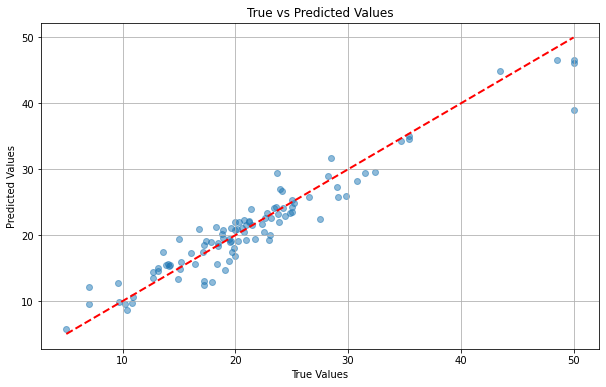

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print performance report
print("Performance Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.show()

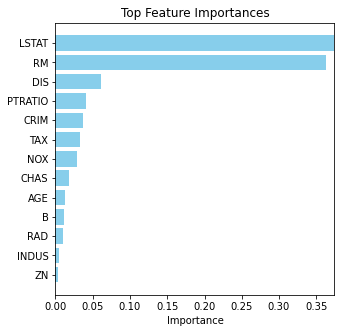

In [17]:

# Create a DataFrame to show feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_features.columns,
    'importance': pipeline.steps[1][1].feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(5,5))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert y axis to have the highest importance on top
plt.savefig('highest_feature_importances.jpeg')
ax = plt.gca()
ax.set_xlim([0, np.max(feature_importance_df['importance'])])
plt.show()

In [18]:
import joblib
SAVE = True

if SAVE:
    # Save the XGBoost OneVsRest model
    joblib.dump(pipeline, '../BHPXGBoost.pkl')